# House Price Prediction using Machine Learning Algorithm

Scrapped Data from zillow.com of Philadelphia,PA using Web Scrapper Tools and perform Machine Learning method.

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('Philadelphia.csv',sep=',') #Reading files from CSV file which is separated by comma
df

,web-scraper-order,web-scraper-start-url,links,links-href,Price,Bed,Bath,sqft,Address
0,1668608127-1,https://www.zillow.com/philadelphia-pa/?search...,7.0,https://www.zillow.com/philadelphia-pa/7_p/,"$350,000",2,2,"1,772","1926 South St #A, Philadelphia, PA 19146"
1,1668608127-2,https://www.zillow.com/philadelphia-pa/?search...,7.0,https://www.zillow.com/philadelphia-pa/7_p/,"$220,000",3,2,"1,230","5139 Walton Ave, Philadelphia, PA 19143"
2,1668608127-3,https://www.zillow.com/philadelphia-pa/?search...,7.0,https://www.zillow.com/philadelphia-pa/7_p/,"$200,000",2,2,"1,200","4011 Arendell Ave, Philadelphia, PA 19114"
3,1668608127-4,https://www.zillow.com/philadelphia-pa/?search...,7.0,https://www.zillow.com/philadelphia-pa/7_p/,"$314,500",2,1,"1,643","1010 Arch St UNIT 202, Philadelphia, PA 19107"
4,1668608127-5,https://www.zillow.com/philadelphia-pa/?search...,7.0,https://www.zillow.com/philadelphia-pa/7_p/,"$355,000",4,2,"1,785","1422 N 4th St, Philadelphia, PA 19122"
...,...,...,...,...,...,...,...,...,...
1066,1669992948-636,https://www.zillow.com/philadelphia-pa/2_p/?se...,6.0,https://www.zillow.com/philadelphia-pa/6_p/,"$120,000",3,1,"1,120","6538 Reedland St, Philadelphia, PA 19142"
1067,1669992948-637,https://www.zillow.com/philadelphia-pa/2_p/?se...,6.0,https://www.zillow.com/philadelphia-pa/6_p/,"$270,000",4,2,"1,170","7207 Hegerman St, Philadelphia, PA 19135"
1068,1669992948-641,https://www.zillow.com/philadelphia-pa/2_p/?se...,6.0,https://www.zillow.com/philadelphia-pa/6_p/,"$179,999",4,3,"1,664","6316 N 21st St, Philadelphia, PA 19138"
1069,1669992948-642,https://www.zillow.com/philadelphia-pa/2_p/?se...,6.0,https://www.zillow.com/philadelphia-pa/6_p/,"$205,000",4,3,"1,426","1500 N 61st St, Philadelphia, PA 19151"


### Data Cleaning

In [3]:
#Dropping 4 columns which came during web scrapping
df.drop(['web-scraper-order','web-scraper-start-url','links','links-href'],axis=1,inplace=True) 
df

,Price,Bed,Bath,sqft,Address
0,"$350,000",2,2,"1,772","1926 South St #A, Philadelphia, PA 19146"
1,"$220,000",3,2,"1,230","5139 Walton Ave, Philadelphia, PA 19143"
2,"$200,000",2,2,"1,200","4011 Arendell Ave, Philadelphia, PA 19114"
3,"$314,500",2,1,"1,643","1010 Arch St UNIT 202, Philadelphia, PA 19107"
4,"$355,000",4,2,"1,785","1422 N 4th St, Philadelphia, PA 19122"
...,...,...,...,...,...
1066,"$120,000",3,1,"1,120","6538 Reedland St, Philadelphia, PA 19142"
1067,"$270,000",4,2,"1,170","7207 Hegerman St, Philadelphia, PA 19135"
1068,"$179,999",4,3,"1,664","6316 N 21st St, Philadelphia, PA 19138"
1069,"$205,000",4,3,"1,426","1500 N 61st St, Philadelphia, PA 19151"


In [4]:
df.info() #Checking null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Price    1071 non-null   object
 1   Bed      1071 non-null   object
 2   Bath     1070 non-null   object
 3   sqft     1070 non-null   object
 4   Address  1071 non-null   object
dtypes: object(5)
memory usage: 42.0+ KB


In [5]:
df=df.dropna() #Removing null values
df

,Price,Bed,Bath,sqft,Address
0,"$350,000",2,2,"1,772","1926 South St #A, Philadelphia, PA 19146"
1,"$220,000",3,2,"1,230","5139 Walton Ave, Philadelphia, PA 19143"
2,"$200,000",2,2,"1,200","4011 Arendell Ave, Philadelphia, PA 19114"
3,"$314,500",2,1,"1,643","1010 Arch St UNIT 202, Philadelphia, PA 19107"
4,"$355,000",4,2,"1,785","1422 N 4th St, Philadelphia, PA 19122"
...,...,...,...,...,...
1066,"$120,000",3,1,"1,120","6538 Reedland St, Philadelphia, PA 19142"
1067,"$270,000",4,2,"1,170","7207 Hegerman St, Philadelphia, PA 19135"
1068,"$179,999",4,3,"1,664","6316 N 21st St, Philadelphia, PA 19138"
1069,"$205,000",4,3,"1,426","1500 N 61st St, Philadelphia, PA 19151"


In [6]:
# Checking Unique values to see what kind of data is there.

In [7]:
df.Bath.unique()

array(['2', '1', '3', '4', '6', '5', '--', '1 ba', '2 ba'], dtype=object)

In [8]:
df.Bed.unique()

array(['2', '3', '4', '6', '1', 'Studio', '5', '2 bds', '3 bds', '4 bds',
       '6 bds', '5 bds', '1 bd', '1,875 sqft lot', '10', '14', '7', '--'],
      dtype=object)

In [9]:
# Converting "--" to Null values so it will be easy to remove them.

In [10]:
df['ZIPCode']=df["Address"].str.split(" ").apply(lambda x: x[-1])

In [11]:
df['Bath']=df['Bath'].replace('--',np.NaN)
df['Bed']=df['Bed'].replace('1,875 sqft lot',np.NaN)
df['sqft']=df['sqft'].replace('--',np.NaN)
df['ZIPCode']=df['ZIPCode'].replace('Street',np.NaN)

In [12]:
df=df.dropna()
df

,Price,Bed,Bath,sqft,Address,ZIPCode
0,"$350,000",2,2,"1,772","1926 South St #A, Philadelphia, PA 19146",19146
1,"$220,000",3,2,"1,230","5139 Walton Ave, Philadelphia, PA 19143",19143
2,"$200,000",2,2,"1,200","4011 Arendell Ave, Philadelphia, PA 19114",19114
3,"$314,500",2,1,"1,643","1010 Arch St UNIT 202, Philadelphia, PA 19107",19107
4,"$355,000",4,2,"1,785","1422 N 4th St, Philadelphia, PA 19122",19122
...,...,...,...,...,...,...
1066,"$120,000",3,1,"1,120","6538 Reedland St, Philadelphia, PA 19142",19142
1067,"$270,000",4,2,"1,170","7207 Hegerman St, Philadelphia, PA 19135",19135
1068,"$179,999",4,3,"1,664","6316 N 21st St, Philadelphia, PA 19138",19138
1069,"$205,000",4,3,"1,426","1500 N 61st St, Philadelphia, PA 19151",19151


In [13]:
#Replacing values

df=df.replace(['Studio'],['1'])
df["Bed"] = df["Bed"].str.replace(" bds", "")
df["Bed"] = df["Bed"].str.replace(" bd", "")
df["Bath"] = df["Bath"].str.replace(" ba", "")
df["Price"] = df["Price"].str.replace("$", "")
df["Price"] = df["Price"].str.replace("K", "000")
df["Price"] = df["Price"].str.replace(",", "")
df["sqft"] = df["sqft"].str.replace(",", "")

#Converting object to integer, as integer will be used in Machine Learning model.
df['Bed']=df['Bed'].astype(int)
df['Bath']=df['Bath'].astype(int)
df['Price']=df['Price'].astype(int)
df['sqft']=df['sqft'].astype(int)
df['ZIPCode']=df['ZIPCode'].astype(int)

In [14]:
df.describe()

,Price,Bed,Bath,sqft,ZIPCode
count,1.015000e+03,1015.000000,1015.000000,1015.000000,1015.000000
mean,3.497642e+05,3.083744,2.154680,1556.935961,19130.708374
std,2.167996e+05,0.993014,0.964209,678.602578,14.782235
min,3.500000e+04,1.000000,1.000000,319.000000,19102.000000
25%,2.150000e+05,3.000000,1.000000,1120.000000,19120.000000
50%,2.999000e+05,3.000000,2.000000,1376.000000,19130.000000
75%,4.177000e+05,4.000000,3.000000,1800.000000,19144.000000
max,1.595000e+06,6.000000,6.000000,5195.000000,19154.000000


**Exploratory Data Analysis**

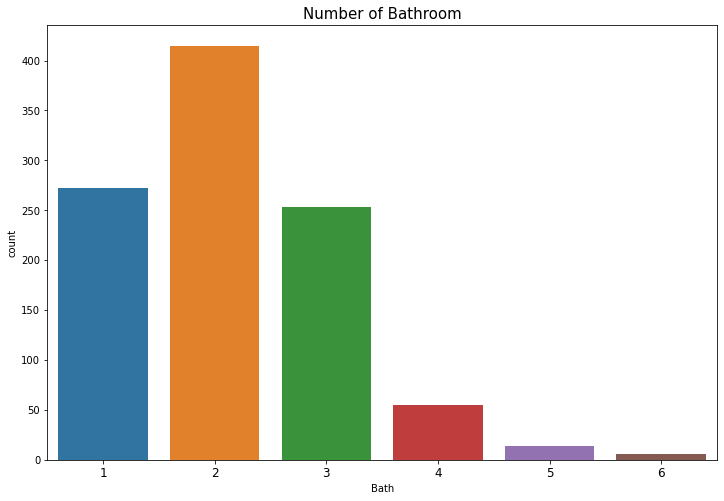

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Bath'])
plt.title("Number of Bathroom", size=15)
plt.xticks(size=12)
plt.show()

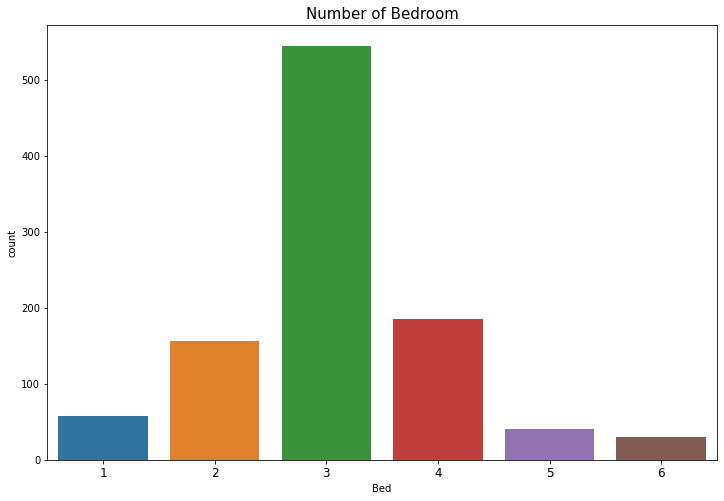

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Bed'])
plt.title("Number of Bedroom", size=15)
plt.xticks(size=12)
plt.show()

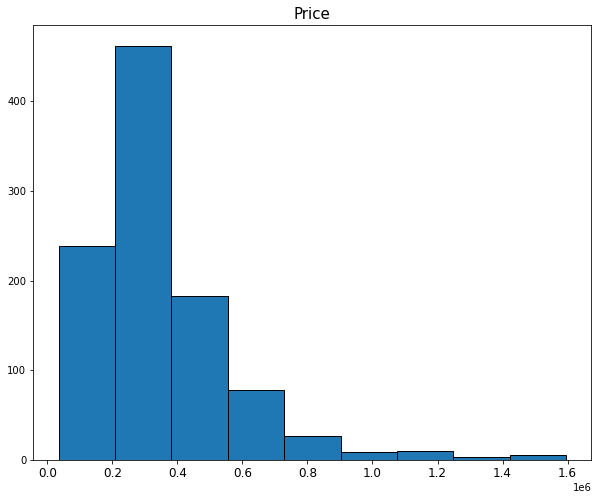

In [17]:
fig = plt.figure(figsize=(10,8))
plt.hist(df['Price'], bins=9,edgecolor="black")
plt.title("Price", size=15)
plt.xticks(size=12)
plt.show()

In [18]:
x = pd.crosstab(df.Bath, df.Bed) #Relationship between Bed and Bath
print(x)

Bed    1   2    3   4   5   6
Bath                         
1     47  52  151  20   2   0
2     10  86  243  59  10   7
3      0  15  134  78  16  10
4      0   3   16  19   9   8
5      1   0    0   8   2   3
6      0   0    1   1   2   2


<AxesSubplot:xlabel='Bed', ylabel='Price'>

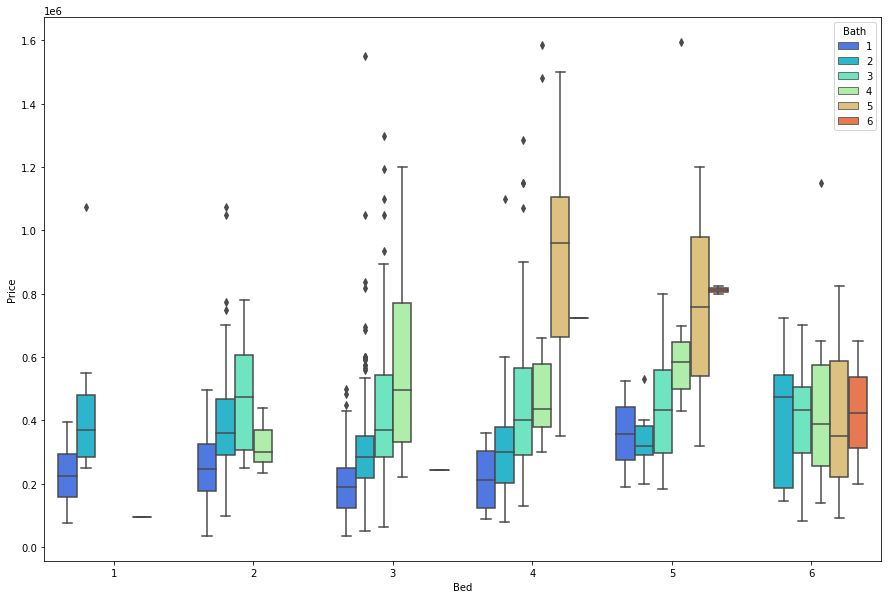

In [19]:
plt.figure(figsize=(15,10)) #Relationship between Bed, Bath and Price
sns.boxplot(x='Bed', y='Price',hue='Bath',data=df,palette='rainbow')

<AxesSubplot:xlabel='ZIPCode', ylabel='Price'>

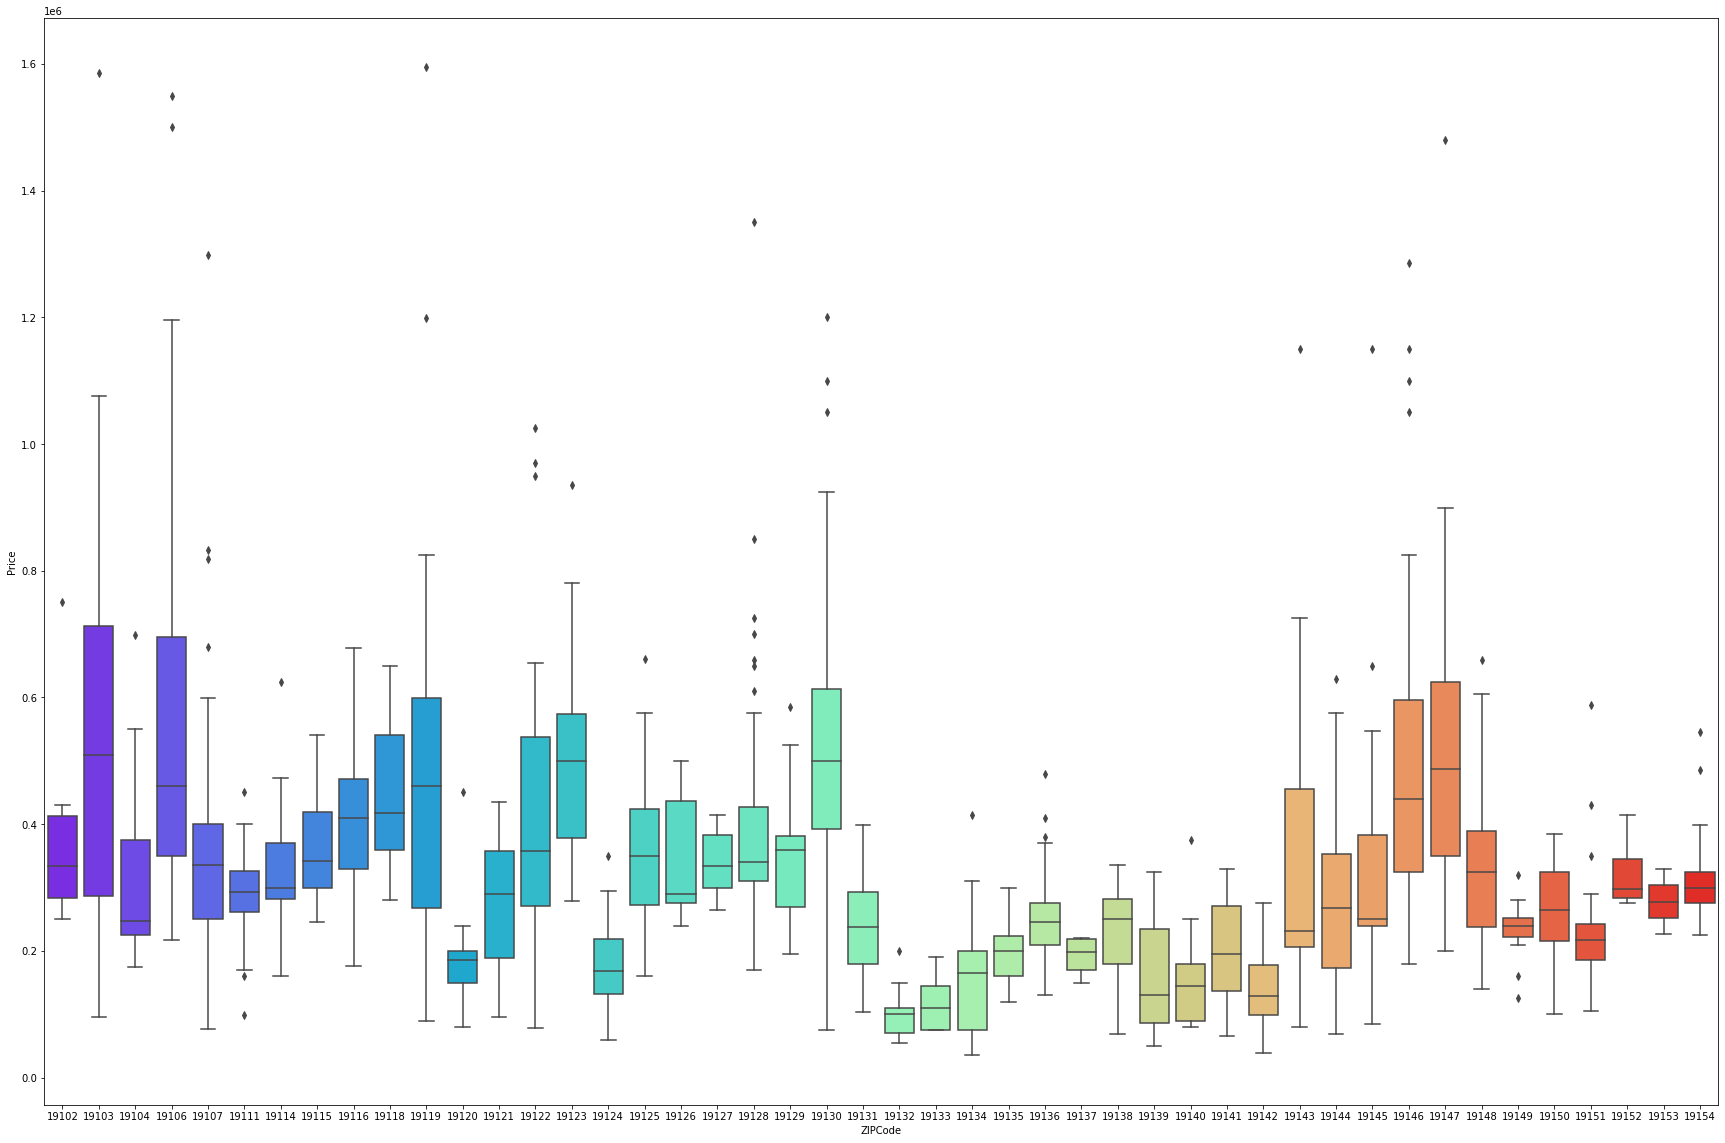

In [20]:
plt.figure(figsize=(30,20)) #Relationship between ZipCode and Price
sns.boxplot(x='ZIPCode', y='Price',data=df,palette='rainbow')

<AxesSubplot:xlabel='Bed', ylabel='sqft'>

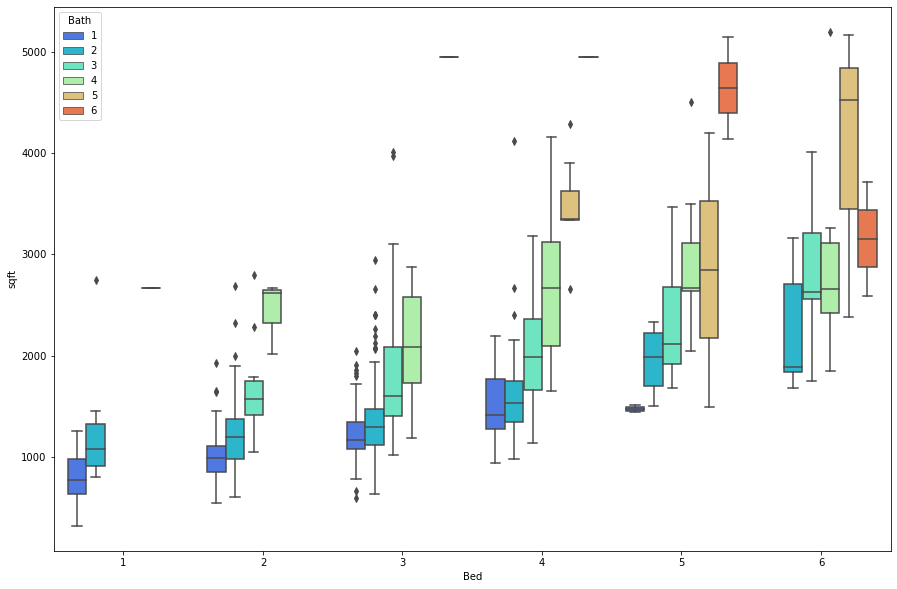

In [21]:
plt.figure(figsize=(15,10)) #Relationship between Bed, Bath and sqft
sns.boxplot(x='Bed', y='sqft',hue='Bath',data=df,palette='rainbow')

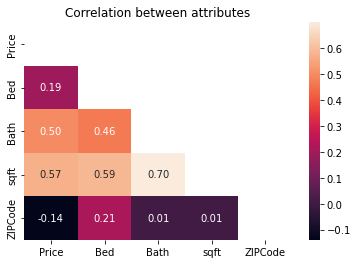

In [22]:
#Correlation between features

plt.figure(figsize=(6,4))
corr = df.corr()
mask = np.triu(corr)
sns.heatmap(corr, annot= True, mask= mask, fmt = '.2f')
plt.title("Correlation between attributes")
plt.show()

# Feature Engineering

In [23]:
#Creating new dataframe so real dataframe is not affected.

df2=df.copy()
df2

,Price,Bed,Bath,sqft,Address,ZIPCode
0,350000,2,2,1772,"1926 South St #A, Philadelphia, PA 19146",19146
1,220000,3,2,1230,"5139 Walton Ave, Philadelphia, PA 19143",19143
2,200000,2,2,1200,"4011 Arendell Ave, Philadelphia, PA 19114",19114
3,314500,2,1,1643,"1010 Arch St UNIT 202, Philadelphia, PA 19107",19107
4,355000,4,2,1785,"1422 N 4th St, Philadelphia, PA 19122",19122
...,...,...,...,...,...,...
1066,120000,3,1,1120,"6538 Reedland St, Philadelphia, PA 19142",19142
1067,270000,4,2,1170,"7207 Hegerman St, Philadelphia, PA 19135",19135
1068,179999,4,3,1664,"6316 N 21st St, Philadelphia, PA 19138",19138
1069,205000,4,3,1426,"1500 N 61st St, Philadelphia, PA 19151",19151


In [24]:
#Normalization on Price and sqft features.
#Values will be between 0 and 1.
price=np.array(df2['Price'])
price=price.reshape(-1,1)

scaler = MinMaxScaler()
df2['Price'] = scaler.fit_transform(price)

sqft=np.array(df2['sqft'])
sqft=sqft.reshape(-1,1)

#scaler = MinMaxScaler()
df2['sqft'] = scaler.fit_transform(sqft)


In [25]:
#Converting into categorical
df2['ZIPCode']=pd.factorize(df2['ZIPCode'])[0]

In [26]:
df2=df2.drop('Address',axis=1) #Dropping Address as it is not needed in Machine Learning model
df2

,Price,Bed,Bath,sqft,ZIPCode
0,0.201923,2,2,0.297990,0
1,0.118590,3,2,0.186833,1
2,0.105769,2,2,0.180681,2
3,0.179167,2,1,0.271534,3
4,0.205128,4,2,0.300656,4
...,...,...,...,...,...
1066,0.054487,3,1,0.164274,35
1067,0.150641,4,2,0.174528,27
1068,0.092948,4,3,0.275841,18
1069,0.108974,4,3,0.227030,17


# Machine Learning Model

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
X = df2.drop('Price',axis=1) # Independet variable
y = df2['Price'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10) 
#Train size 75% and Test size 25%

In [28]:
X_train.shape,y_train.shape

((761, 4), (761,))

In [29]:
X_test.shape,y_test.shape

((254, 4), (254,))

# Gradient Boosting Algorithm

In [30]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4)

GBR.fit(X_train, y_train)
y_pred=GBR.predict(X_test)
print(GBR.score(X_train,y_train)) # Score

0.8697454418860517


In [31]:
r2_score(y_test,y_pred) #R squared value

0.6355193952457867

In [32]:
mean_squared_error(y_test, y_pred) #Mean Squared Error

0.008227038903493774